In [1]:
import sys 
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file = u"C:\Data_Python\Files\CSV\EcommerceCustomers.csv"

In [2]:
customers = pd.read_csv(file,encoding='latin-1')

In [5]:
customers.head()
customers.info() # basic information about cols in dataset
customers.describe() #simple stats about numeric data in dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


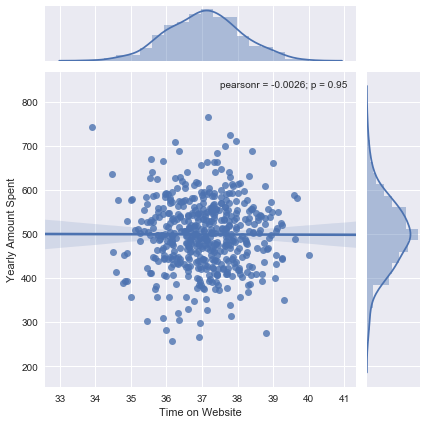

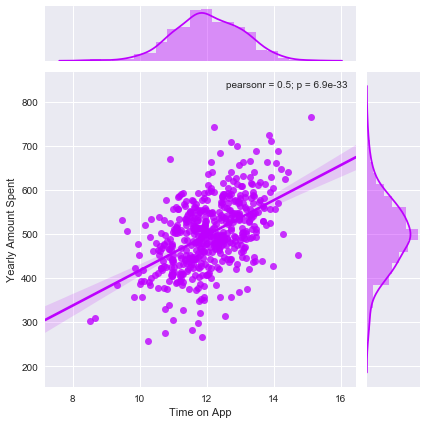

In [22]:
website_spent = sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='reg')
app_spent     = sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='reg',color='#bd00ff')

In [23]:
# creating seaborn plot 

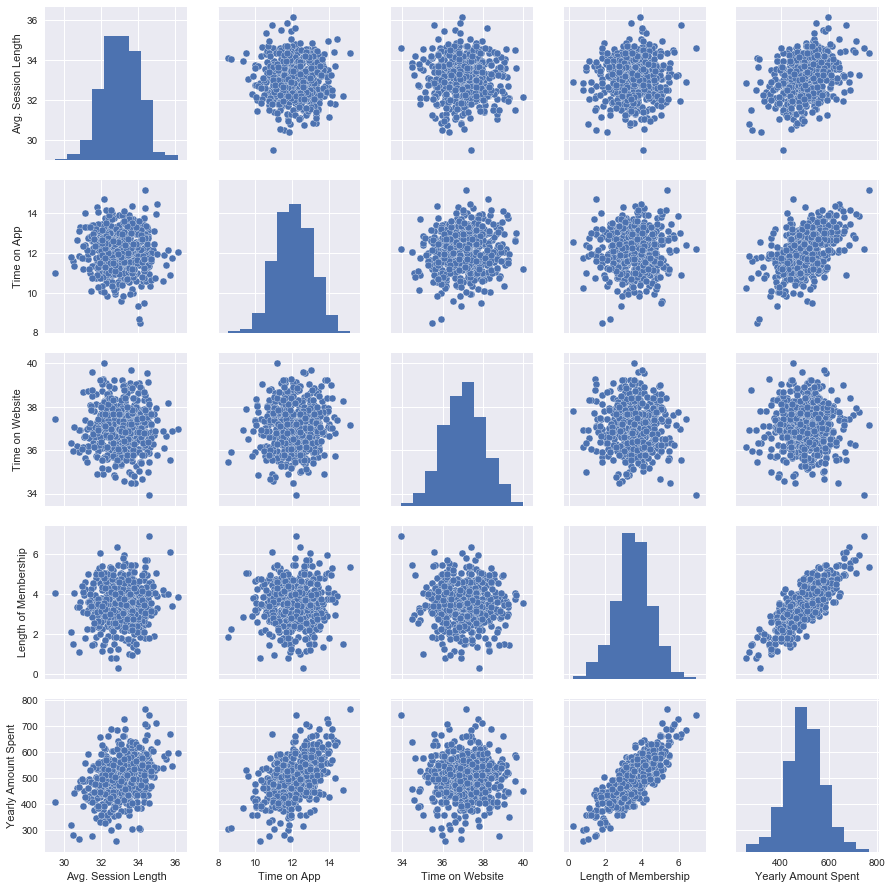

In [24]:
sns.pairplot(customers)

In [25]:
# sns.lmplot

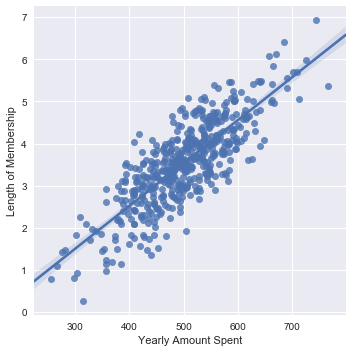

In [27]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers) 
#lm plot comparing yearly amount spent against length of membership

y dependent variables 

y = df['Value_A']

x independent variables

X = df[['Value0','Value1','Value2']]



In [28]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [29]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [41]:
#import sklearn stack 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
from sklearn.linear_model import LinearRegression

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [32]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
coef_SessionLength = lm.coef_[0]
coef_TimeonApp = lm.coef_[1]
coef_TimeonWeb = lm.coef_[2]
coef_LengthMember = lm.coef_[3]

In [37]:
predictions = lm.predict(X_test)

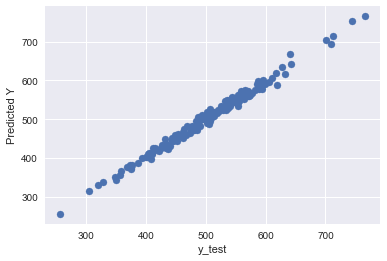

In [40]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')

In [42]:
# Evaluating Model 
Mean_Abs_Error = met.mean_absolute_error(y_test,predictions) 
Mean_Squared_Error = met.mean_squared_error(y_test,predictions)
Root_Mean_Square_Error = np.sqrt(Mean_Squared_Error)

In [44]:
print('MAE:',str(Mean_Abs_Error))
print('MSE:',str(Mean_Squared_Error))
print('RMSE:',str(Root_Mean_Square_Error))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


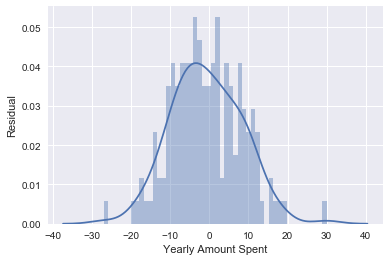

In [50]:
# plotting the delta between observed-y values and predicted y-values 
sns.distplot(y_test-predictions,bins=50,kde=True)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Residual')
#model fits the nomal distribution 

In [51]:
coeffs = pd.DataFrame(data=lm.coef_.transpose(),
                      index=X.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


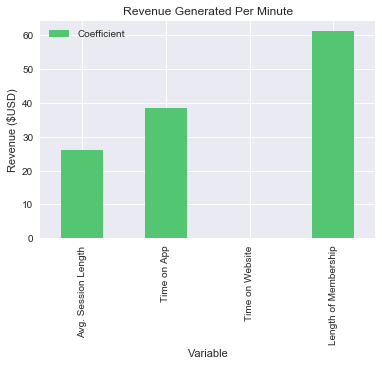

In [65]:
coeffs.plot(kind='bar',color='#54C571')
plt.title('Revenue Generated Per Minute')
plt.xlabel('Variable')
plt.ylabel('Revenue ($USD)')
coeffs